In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_excel('C:/Users/DELL/Downloads/Data_Train (1).xlsx')

In [4]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
data.describe

<bound method NDFrame.describe of                                   Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Tr

In [6]:
data.shape

(6019, 12)

In [7]:
data.size

72228

In [8]:
data.describe(include="object")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


# data preprocessing

In [9]:
def data_cleaner(data,return_price=False):
        n=len(data)
        names_engine=data['Name'][data['Engine'].isnull()]
        names_power=data['Name'][data['Power'].isnull()]
        names_seats=data['Name'][data['Seats'].isnull()]
        names_mileage=data['Name'][data['Mileage'].isnull()]
        names_engine=names_engine.unique()
        names_power=names_power.unique()
        names_seats=names_seats.unique()
        names_mileage=names_mileage.unique()
        for i in names_engine:
            if data['Engine'][data['Name']==i].notnull().any():
                indices=data['Engine'][data['Name']==i].index
                for i in indices:
                    if type(data.Engine[i])==str:
                        engine=data.Engine[i]
                for i in indices:
                    if type(data.Engine[i]==float):
                        data.Engine[i]=engine
        for i in names_power:
            if data['Power'][data['Name']==i].notnull().any():
                indices=data['Power'][data['Name']==i].index
                for i in indices:
                    if type(data.Power[i])==str:
                        power=data.Power[i]
                for i in indices:
                    if type(data.Power[i]==float):
                        data.Power[i]=power
        for i in names_seats:
            if data['Seats'][data['Name']==i].notnull().any():
                indices=data['Seats'][data['Name']==i].index
                for i in indices:
                    if data.Seats[i]>0:
                        seats=data.Seats[i]
                for i in indices:
                    if type(data.Seats[i]==float):
                        data.Seats[i]=seats
        for i in names_mileage:
            if data['Mileage'][data['Name']==i].notnull().any():
                indices=data['Mileage'][data['Name']==i].index
                for i in indices:
                    if type(data.Mileage[i])==str:
                        Mileage=data.Mileage[i]
                for i in indices:
                    if type(data.Mileage[i]==float):
                        data.Mileage[i]=Mileage
        for i in range(0,n):
            try:
                data['Mileage'][i]=float(data['Mileage'][i][:4])
            except:
                pass
        for i in range(0,n):
            try:
                data['Engine'][i]=float(data['Engine'][i][:-3])
            except:
                pass
        for i in range(0,n):
            try:
                data['Power'][i]=float(data['Power'][i][:-4])
            except ValueError:
                data['Power'][i]=float('NaN')
            except:
                pass
        data=data.dropna(subset=['Mileage'])
        if return_price:
            price=data["Price"]
            data=data.drop("Price",axis=1)
        data['Mileage']=pd.to_numeric(data['Mileage'])
        data['Engine']=pd.to_numeric(data['Engine'])
        data['Power']=pd.to_numeric(data['Power'])
        if return_price:
            return data,price
        else:
            return data

In [10]:
data_cleaned,price=data_cleaner(data,return_price=True)
data_cleaned.info()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is tr

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 11 columns):
Name                 6017 non-null object
Location             6017 non-null object
Year                 6017 non-null int64
Kilometers_Driven    6017 non-null int64
Fuel_Type            6017 non-null object
Transmission         6017 non-null object
Owner_Type           6017 non-null object
Mileage              6017 non-null float64
Engine               5986 non-null float64
Power                5879 non-null float64
Seats                5981 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 564.1+ KB


In [11]:
data_cleaned.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                31
Power                138
Seats                 36
dtype: int64

In [12]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


# EDA

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
5.0     5020
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64


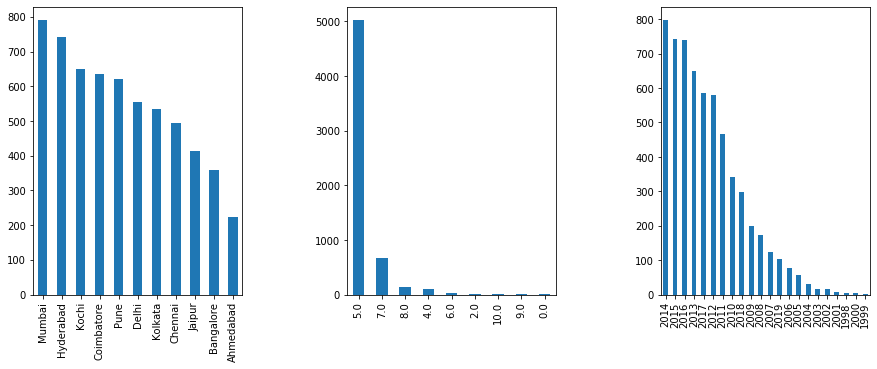

In [13]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5,hspace=0.2)

plt.subplot(131)
print(data['Location'].value_counts())
data['Location'].value_counts().plot(kind='bar')

plt.subplot(132)
print(data['Seats'].value_counts())
data['Seats'].value_counts().plot(kind='bar')

plt.subplot(133)
print(data['Year'].value_counts())
data['Year'].value_counts().plot(kind='bar')

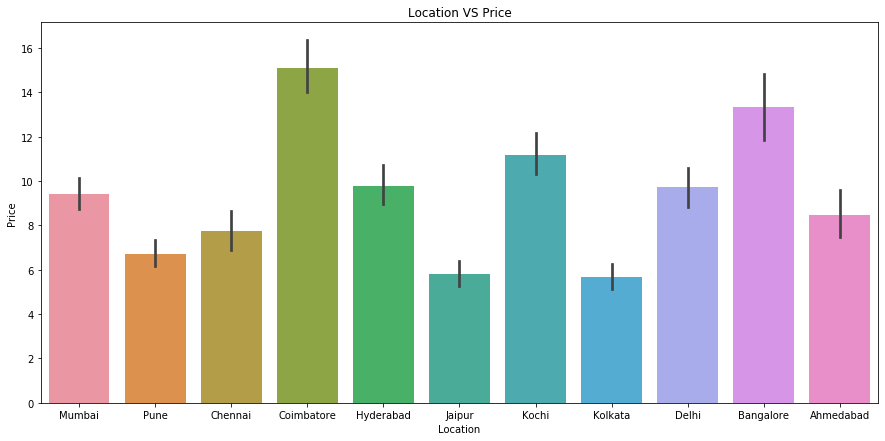

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(data_cleaned['Location'],price)
plt.title('Location VS Price')
plt.show()

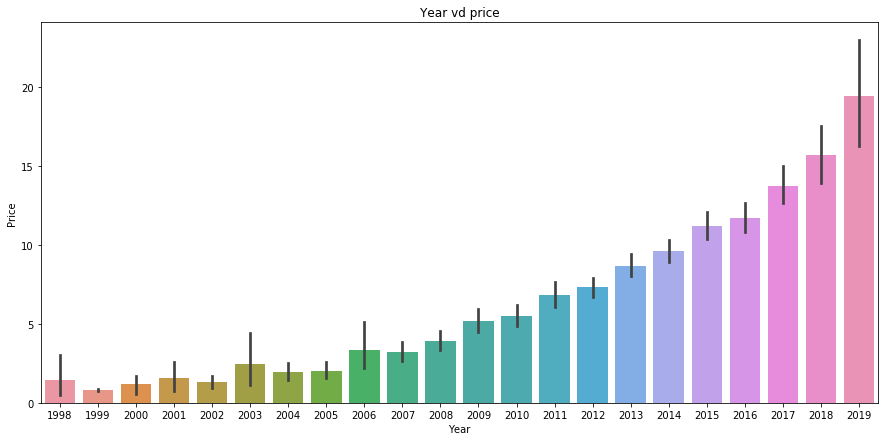

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(data_cleaned['Year'],price)
plt.title('Year vd price')
plt.show()

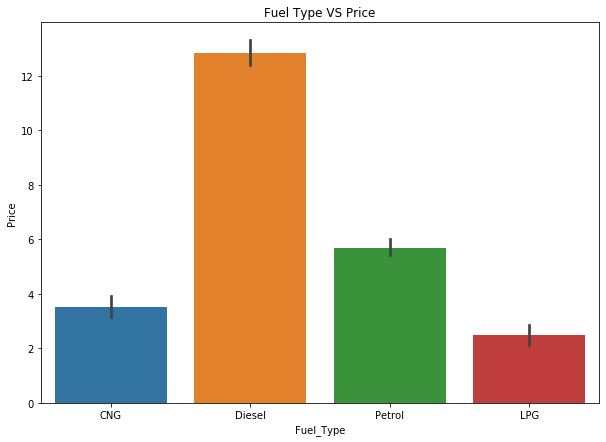

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(data_cleaned['Fuel_Type'],price)
plt.title('Fuel Type VS Price')
plt.show()

Text(0.5, 1.0, 'Transmission VS Price')

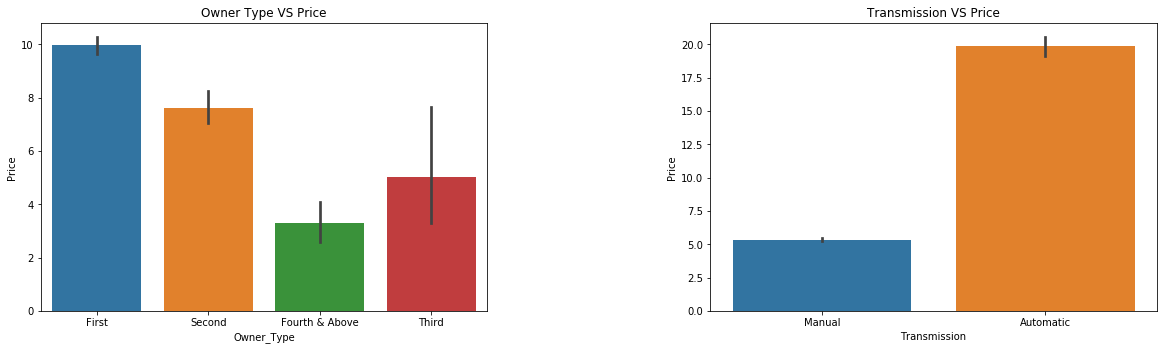

In [17]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5,hspace=0.2)

plt.subplot(121)
sns.barplot(data_cleaned['Owner_Type'],price)
plt.title('Owner Type VS Price')


plt.subplot(122)
sns.barplot(data_cleaned['Transmission'],price)
plt.title('Transmission VS Price')

# creating pipeline

In [18]:
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names]

In [19]:
from sklearn.base import BaseEstimator,TransformerMixin

class DataAssembler(BaseEstimator,TransformerMixin):
    def fit(self,data,y=None):
        self.data_remain=data[["Year","Kilometers_Driven"]]
        return self
    def transform(self,data,y=None):
        return self.data_remain.values

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
data_cleaner1=Pipeline([
    ("Selector1",DataFrameSelector(["Mileage","Engine","Power","Seats"])),
    ("Imputer",SimpleImputer(strategy="median")),
])
data_cleaner2=Pipeline([
    ("Selector2",DataFrameSelector(["Name","Location"])),
    ("encoder1",OrdinalEncoder()),
])
data_cleaner3=Pipeline([
    ("Selector3",DataFrameSelector(["Fuel_Type","Transmission","Owner_Type"])),
    ("encoder2",OneHotEncoder(sparse=False)),
])


In [21]:
from sklearn.pipeline import FeatureUnion

full_pipeline=FeatureUnion(transformer_list=[
    ("pipeline1",data_cleaner2),
    ("pipeline2",DataAssembler()),
    ("pipeline3",data_cleaner3),
    ("pipeline4",data_cleaner1),
])

In [22]:
final_data=full_pipeline.fit_transform(data_cleaned)

In [23]:
final_data[0]

array([1.199e+03, 9.000e+00, 2.010e+03, 7.200e+04, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 2.660e+01, 9.980e+02, 5.816e+01, 5.000e+00])

In [24]:
data.values[0]

array(['Maruti Wagon R LXI CNG', 'Mumbai', 2010, 72000, 'CNG', 'Manual',
       'First', 26.6, 998.0, 58.16, 5.0, 1.75], dtype=object)

# training and testing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test=train_test_split(final_data,price,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6906655237635424

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
tree_reg.score(X_test,y_test)

0.6600196872182132

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [28]:
lin_predict=lr.predict(X_test)
tree_reg.fit(X_train,y_train)
tree_predict=tree_reg.predict(X_test)
forest_reg.fit(X_train,y_train)
forest_predict=forest_reg.predict(X_test)

In [29]:
print("Mean y_test: ",y_test.mean())
print("Standard Deviation(STD) of y_test: ",y_test.std())
print("Predicted Mean of Lin Reg Model: ",lin_predict.mean())
print("Predicted STD of Lin Reg Model: ",lin_predict.std())
print("Predicted Mean of Decision Tree Reg Model: ",tree_predict.mean())
print("Predicted STD of Decision Tree Reg Model: ",tree_predict.std())
print("Predicted Mean of Random Forest Reg Model: ",forest_predict.mean())
print("Predicted STD of Random Forest Reg Model: ",forest_predict.std())

Mean y_test:  9.23491694352159
Standard Deviation(STD) of y_test:  10.837600408755732
Predicted Mean of Lin Reg Model:  9.400421888894863
Predicted STD of Lin Reg Model:  9.351918549069563
Predicted Mean of Decision Tree Reg Model:  9.538679401993356
Predicted STD of Decision Tree Reg Model:  11.984191856096453
Predicted Mean of Random Forest Reg Model:  9.527584371539314
Predicted STD of Random Forest Reg Model:  11.098463823633011


# considering randomforest regressor

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}
]


forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [31]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [32]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [33]:
forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)
forest_predict=forest_reg.predict(X_test)
print(forest_predict.mean())
print(forest_predict.std())

9.502010174418604
10.925353911726543


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Considering DecisionTreeRegressor

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid=[
    {"max_features":[2,4,6,8]}
]

tree_reg=DecisionTreeRegressor()
grid=GridSearchCV(tree_reg,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [36]:
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=8,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
grid.best_params_

{'max_features': 8}

In [38]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
tree_predict=tree_reg.predict(X_test)
print(tree_predict.mean())
print(tree_predict.std())

9.505008305647841
11.742519795078259


# On the Total DataSet

In [39]:
lin_predict=lr.predict(final_data)
tree_predict=tree_reg.predict(final_data)
forest_predict=forest_reg.predict(final_data)
print(lin_predict.mean())
print(lin_predict.std())
print(tree_predict.mean())
print(tree_predict.std())
print(tree_predict.max())
print(tree_predict.min())
print(forest_predict.mean())
print(forest_predict.std())
print(forest_predict.max())
print(forest_predict.min())

9.511457196980357
9.416611735951346
9.532384909423302
11.37012326163867
160.0
0.44
9.540829210095207
10.882893772694901
138.58499999999998
0.5499999999999999


In [40]:
tree_predicted_price=pd.DataFrame(tree_predict,columns=["Price"])

In [41]:
print(tree_predicted_price.describe())
print(data['Price'].describe())

             Price
count  6017.000000
mean      9.532385
std      11.371068
min       0.440000
25%       3.500000
50%       5.650000
75%      10.000000
max     160.000000
count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64


# TEST DATA

In [47]:
test_data=pd.read_excel('C:/Users/DELL/Downloads/Data_Test (1).xlsx')
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [48]:
test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [49]:
test_data_cleaned=data_cleaner(test_data)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is tr

In [50]:
final_test_data=full_pipeline.fit_transform(test_data_cleaned)

In [51]:
predicted_test_price=tree_reg.predict(final_test_data)

In [52]:
predicted_test_price

array([ 3.31,  2.88, 12.4 , ...,  2.1 ,  4.75, 17.25])